In [3]:
# Import libraries. You may or may not use all of these.
# !pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling

In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-02-20 19:49:46--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.04s   

2023-02-20 19:49:46 (1.13 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
# split data into x (features) and y (labels)
x = dataset.copy()
y = x.pop('expenses')

In [6]:
x.shape, y.shape

((1338, 6), (1338,))

In [8]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    # normalize all numerical columns to values between 0 and 1
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    # one-hot encode the categorical columns
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

In [20]:
# Split into train and test sets
train_dataset_raw, test_dataset_raw, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
# fit the column transformer on the training data
ct.fit(train_dataset_raw)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [24]:
# Transform the training and test data
train_dataset = ct.transform(train_dataset_raw)
test_dataset = ct.transform(test_dataset_raw)

In [25]:
len(train_dataset), len(test_dataset)

(1070, 268)

In [28]:
# Build a neural network
model = keras.models.Sequential([
    layers.Dense(100),
    layers.Dense(10),
    layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# Train the model
history = model.fit(train_dataset, train_labels, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 765us/step - loss: 13342.4355 - mae: 13342.4355 - mse: 322355488.0000
Epoch 2/100
34/34 [==============================] - 0s 717us/step - loss: 13331.6250 - mae: 13331.6250 - mse: 322065952.0000
Epoch 3/100
34/34 [==============================] - 0s 743us/step - loss: 13306.0586 - mae: 13306.0586 - mse: 321373312.0000
Epoch 4/100
34/34 [==============================] - 0s 695us/step - loss: 13254.8535 - mae: 13254.8535 - mse: 320005728.0000
Epoch 5/100
34/34 [==============================] - 0s 683us/step - loss: 13167.3184 - mae: 13167.3184 - mse: 317650848.0000
Epoch 6/100
34/34 [==============================] - 0s 670us/step - loss: 13032.8994 - mae: 13032.8994 - mse: 314035168.0000
Epoch 7/100
34/34 [==============================] - 0s 682us/step - loss: 12841.2451 - mae: 12841.2451 - mse: 308969920.0000
Epoch 8/100
34/34 [==============================] - 0s 748us/step - loss: 12582.2383 - mae: 12582.2383 - mse: 3022630

34/34 [==============================] - 0s 665us/step - loss: 4439.0464 - mae: 4439.0464 - mse: 65455680.0000
Epoch 67/100
34/34 [==============================] - 0s 924us/step - loss: 4332.4888 - mae: 4332.4888 - mse: 64409484.0000
Epoch 68/100
34/34 [==============================] - 0s 691us/step - loss: 4230.6836 - mae: 4230.6836 - mse: 62974292.0000
Epoch 69/100
34/34 [==============================] - 0s 661us/step - loss: 4136.9502 - mae: 4136.9502 - mse: 61661224.0000
Epoch 70/100
34/34 [==============================] - 0s 711us/step - loss: 4049.2524 - mae: 4049.2524 - mse: 59430308.0000
Epoch 71/100
34/34 [==============================] - 0s 682us/step - loss: 3969.2224 - mae: 3969.2224 - mse: 58708388.0000
Epoch 72/100
34/34 [==============================] - 0s 756us/step - loss: 3900.5925 - mae: 3900.5925 - mse: 57140412.0000
Epoch 73/100
34/34 [==============================] - 0s 771us/step - loss: 3843.1602 - mae: 3843.1602 - mse: 55708672.0000
Epoch 74/100
34/34 [=

9/9 - 0s - loss: 3442.5229 - mae: 3442.5229 - mse: 41993916.0000 - 68ms/epoch - 8ms/step
Testing set Mean Abs Error: 3442.52 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 721us/step


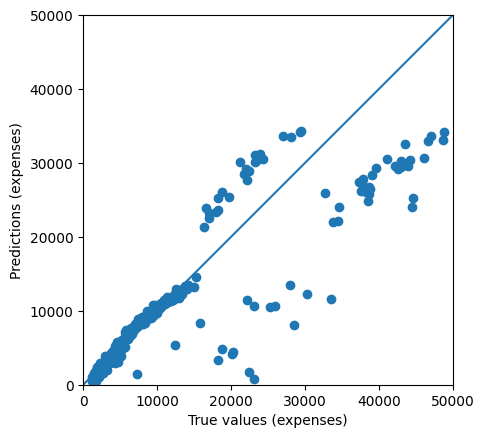

In [29]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
